Visualizing crystal system distribution for material family: Al-N


Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

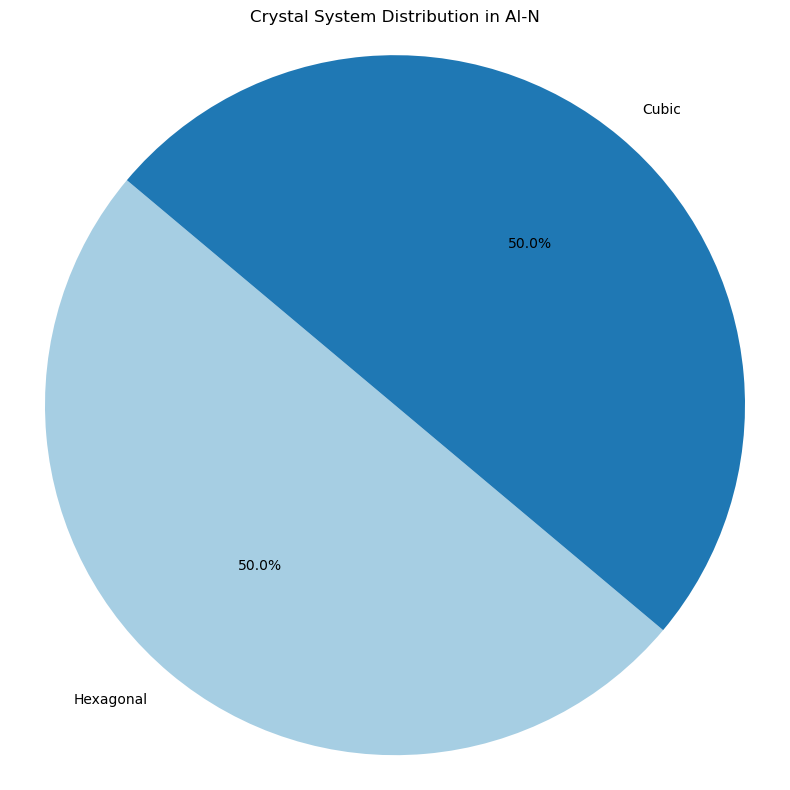

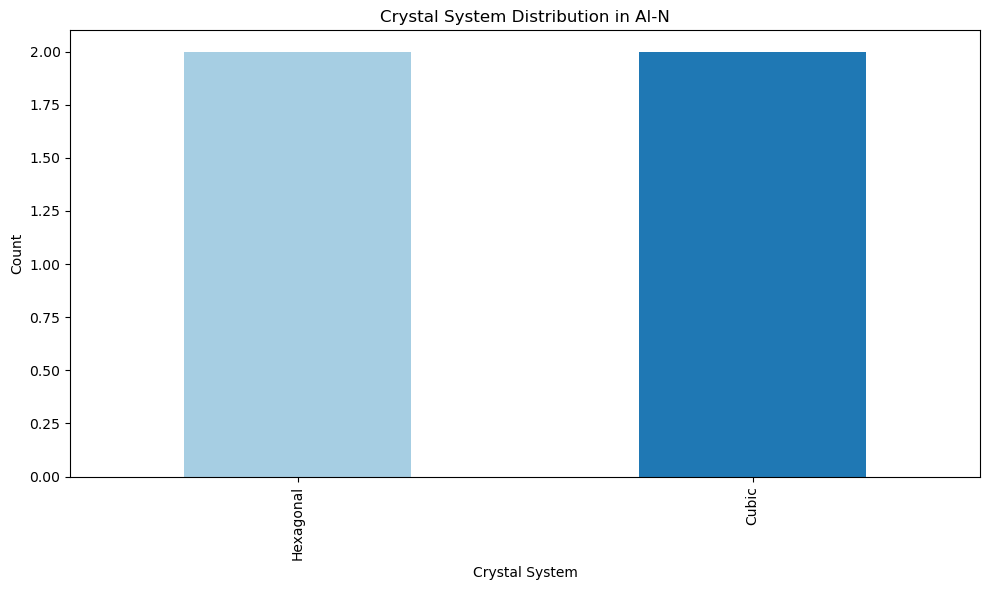

In [2]:
import os #import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from mp_api.client import MPRester
import warnings
warnings.filterwarnings('ignore')

#Input Materials Project API key
API_KEY = "API"  #replace with your own API key

def visualize_crystal_system_distribution(chemsys="Al-N"): #different material system can be inputted

    print(f"Visualizing crystal system distribution for material family: {chemsys}")
    
    with MPRester(API_KEY) as mpr: #connect to materials project database, request the listed fields
        docs = mpr.materials.summary.search(
            chemsys=chemsys,
            fields=[
                "material_id", 
                "formula_pretty", #chemical formula
                "symmetry" #symmetry information
            ]
        )

        #extract crystal systems from materials project
        crystal_systems = [] #initialize list
        for doc in docs: #loop through each material
            try:
                crystal_system = doc.symmetry.crystal_system if hasattr(doc, 'symmetry') else "Unknown"
            except:
                crystal_system = "Unknown" #if symmetry is NA, label as unknown
            
            crystal_systems.append(crystal_system) #add to list

        #create DataFrame to store crystal systems of materials
        df = pd.DataFrame(crystal_systems, columns=["crystal_system"])

        if df.empty: #if no data is found
            print("No materials found with crystal system data.")
            return

        #count occurrences of each crystal system
        crystal_system_counts = df["crystal_system"].value_counts()

        #Pie Chart Visualization
        plt.figure(figsize=(8, 8))
        plt.pie(crystal_system_counts, labels=crystal_system_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
        plt.title(f"Crystal System Distribution in {chemsys}")
        plt.axis('equal')  #equal aspect ratio ensures that pie chart is circular
        plt.tight_layout()
        plt.savefig(f"crystal_system_distribution_{chemsys.replace('-', '_')}.png")
        plt.show()

        #Bar Graph Visualization
        plt.figure(figsize=(10, 6))
        crystal_system_counts.plot(kind='bar', color=plt.cm.Paired.colors)
        plt.xlabel("Crystal System")
        plt.ylabel("Count")
        plt.title(f"Crystal System Distribution in {chemsys}")
        plt.tight_layout()
        plt.savefig(f"crystal_system_distribution_{chemsys.replace('-', '_')}_bar.png")
        plt.show()

        return crystal_system_counts

def main():
    #set chemical system
    chemical_system = "Al-N" #different system can be inputted here
    visualize_crystal_system_distribution(chemical_system)

if __name__ == "__main__":
    main()
